In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('NY data summary Interpolated .csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,193.187111,5.93,46445.0,18798.1140,4.8,1096833.984,687.39410,32.90%,214701.0,0.90%,5852.065587,2.39,186.9
1,4/1/2005,195.162335,5.86,46844.7,18800.8659,4.8,1102432.129,685.96012,32.90%,215126.0,0.87%,4700.094832,2.74,187.9
2,5/1/2005,196.732454,5.72,47244.4,18803.6178,4.7,1108030.274,684.52614,32.90%,215551.0,0.83%,4978.336136,2.65,188.4
3,6/1/2005,198.197612,5.58,47644.1,18806.3697,4.8,1113628.419,683.09216,32.90%,215976.0,0.80%,4541.492838,2.49,187.6
4,7/1/2005,199.811814,5.70,48043.8,18809.1216,4.8,1119226.564,681.65818,32.83%,216901.0,0.83%,4545.705558,2.50,189.2
5,8/1/2005,201.500557,5.82,48443.5,18811.8735,4.9,1124824.709,680.22420,32.77%,217826.0,0.87%,5644.986814,2.24,191.3
6,9/1/2005,204.075072,5.77,48843.2,18814.6254,5.0,1130422.853,678.79022,32.70%,218751.0,0.90%,4939.945161,1.93,195.5
7,10/1/2005,206.680701,6.07,49242.9,18817.3773,5.0,1136020.998,677.35624,32.63%,219900.0,0.90%,4275.704563,1.99,194.5
8,11/1/2005,209.323123,6.33,49642.6,18820.1292,5.0,1141619.143,675.92226,32.57%,221049.0,0.90%,4456.121242,2.27,193.1
9,12/1/2005,212.054408,6.27,50042.3,18822.8811,4.9,1147217.288,674.48828,32.50%,222198.0,0.90%,4594.430120,2.47,191.8


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,193.187111,5.93,46445.0,18798.1140,4.8,1096833.984,687.39410,214701.0,5852.065587,2.39,186.9,32.90,0.90
1,4/1/2005,195.162335,5.86,46844.7,18800.8659,4.8,1102432.129,685.96012,215126.0,4700.094832,2.74,187.9,32.90,0.87
2,5/1/2005,196.732454,5.72,47244.4,18803.6178,4.7,1108030.274,684.52614,215551.0,4978.336136,2.65,188.4,32.90,0.83
3,6/1/2005,198.197612,5.58,47644.1,18806.3697,4.8,1113628.419,683.09216,215976.0,4541.492838,2.49,187.6,32.90,0.80
4,7/1/2005,199.811814,5.70,48043.8,18809.1216,4.8,1119226.564,681.65818,216901.0,4545.705558,2.50,189.2,32.83,0.83


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,46445.00000,18798.11400,4.8,1096833.984,687.394100,214701.0000,5852.065587,2.39,186.900,32.90,0.90
1,5.86,46844.70000,18800.86590,4.8,1102432.129,685.960120,215126.0000,4700.094832,2.74,187.900,32.90,0.87
2,5.72,47244.40000,18803.61780,4.7,1108030.274,684.526140,215551.0000,4978.336136,2.65,188.400,32.90,0.83
3,5.58,47644.10000,18806.36970,4.8,1113628.419,683.092160,215976.0000,4541.492838,2.49,187.600,32.90,0.80
4,5.70,48043.80000,18809.12160,4.8,1119226.564,681.658180,216901.0000,4545.705558,2.50,189.200,32.83,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,75118.33333,19295.79525,4.6,1757792.473,553.278475,245561.3333,3118.553708,2.92,228.207,28.13,2.53
150,3.81,75407.66667,19291.96500,4.6,1766063.643,550.401800,245631.0000,2928.686450,2.79,230.219,28.00,2.50
151,3.90,75697.00000,19288.13475,4.5,1774334.813,547.525125,245540.3333,3500.473181,2.54,229.361,27.90,2.47
152,3.92,75986.33333,19284.30450,4.5,1782605.984,544.648450,245449.6667,3968.326158,2.71,228.960,27.80,2.43


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286e+00,1.037777,3.350000e+00,3.912500e+00,4.430000e+00,5.850000e+00,6.760000e+00
Personal_Income,154.0,5.993081e+04,7510.820739,4.644500e+04,5.420160e+04,5.891883e+04,6.547181e+04,7.627567e+04
Resident_Population,154.0,1.911108e+04,178.412287,1.879811e+04,1.895796e+04,1.910527e+04,1.929542e+04,1.933478e+04
Unemployment_Rate,154.0,6.403896e+00,1.829778,4.200000e+00,4.800000e+00,5.750000e+00,8.500000e+00,9.300000e+00
GDP,154.0,1.391972e+06,196649.253629,1.096834e+06,1.201965e+06,1.359327e+06,1.558194e+06,1.790877e+06
Crime_Rate,154.0,6.067952e+02,35.692835,5.417718e+02,5.787190e+02,6.030705e+02,6.311594e+02,6.873941e+02
Median_Debt,154.0,2.437323e+05,9064.575554,2.147010e+05,2.443247e+05,2.455643e+05,2.487424e+05,2.531410e+05
New_Structures,154.0,3.455813e+03,2312.150506,1.017219e+03,1.895782e+03,3.284193e+03,4.370401e+03,1.751628e+04
Economic_Conditions_Index,154.0,2.360584e+00,1.351554,-3.190000e+00,2.355000e+00,2.750000e+00,3.040000e+00,4.050000e+00
CPI less shelter,154.0,2.153250e+02,12.967668,1.869000e+02,2.047545e+02,2.214430e+02,2.263057e+02,2.302770e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.795518,-1.754158,-0.876552,-1.500836,2.258124,-3.202725,1.036374,0.021764,-2.191989,0.509630,-1.477954
1,1.051011,-1.742301,-1.738734,-0.876552,-1.472369,2.217949,-3.155839,0.538149,0.280726,-2.114874,0.509630,-1.490676
2,0.916107,-1.689085,-1.723309,-0.931203,-1.443901,2.177773,-3.108954,0.658488,0.214135,-2.076316,0.509630,-1.507639
3,0.781203,-1.635868,-1.707885,-0.876552,-1.415433,2.137597,-3.062068,0.469554,0.095753,-2.138008,0.509630,-1.520362
4,0.896835,-1.582651,-1.692461,-0.876552,-1.386966,2.097422,-2.960022,0.471376,0.103152,-2.014624,0.474525,-1.507639
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,2.022085,1.035343,-0.985855,1.860267,-1.499370,0.201773,-0.145864,0.413906,0.993395,-1.882471,-0.786700
150,-0.924366,2.060608,1.013874,-0.985855,1.902328,-1.579965,0.209459,-0.227981,0.317720,1.148550,-1.947664,-0.799422
151,-0.837642,2.099130,0.992406,-1.040506,1.944388,-1.660561,0.199457,0.019315,0.132748,1.082386,-1.997813,-0.812145
152,-0.818370,2.137652,0.970937,-1.040506,1.986449,-1.741156,0.189454,0.221661,0.258529,1.051463,-2.047962,-0.829108


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

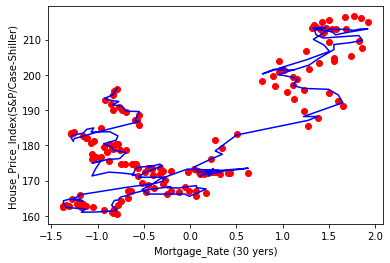

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.51
Accuracy: 99.18 %.


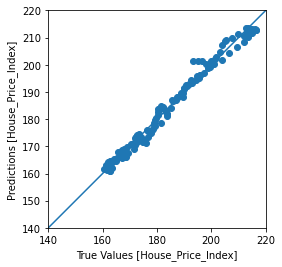

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9857730094001372

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,3.537103
1,-27.768180
2,-22.753275
3,-9.693931
4,44.684747
5,10.872758
6,18.204429
7,0.178465
8,1.156512
9,0.619328


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[201.3615852  201.3980594  201.48795283 200.28888384 201.51783267
 202.03829246 201.95364392 204.2695949  206.67969528 208.46584283
 210.08159513 211.69297773 212.94285184 212.92979679 212.63835798
 213.04448352 213.04889604 212.02238517 211.37240932 212.25552688
 212.72518435 213.26691163 213.44388662 213.43719953 213.09625501
 211.37902103 210.46853532 211.17482291 209.81217517 209.18999566
 208.61185308 207.18001968 204.67323984 202.76386065 200.1525091
 199.31304975 198.69812785 197.04248269 196.18930715 195.92132292
 194.29369407 192.13468026 188.1997127  188.22058018 187.10945625
 182.97047646 178.45543014 177.5161476  176.12227701 173.83091301
 172.44522169 173.55383343 172.90208831 172.98330774 172.19023013
 172.05244326 171.37191499 171.74422389 173.41527172 172.29172027
 171.43091121 172.92139239 173.16146514 173.31251958 171.69246451
 170.47092695 169.14181057 167.49721469 166.21355379 166.22255526
 165.56873347 167.65654445 168.04587406 168.62560962 167.93270892
 168.033544

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,201.361585
1,201.398059
2,201.487953
3,200.288884
4,201.517833
...,...
149,192.815427
150,193.315722
151,194.376596
152,195.094501


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.795518,-1.742301,-1.689085,-1.635868,-1.582651,-1.529435,-1.476218,-1.423002,-1.369785,-1.316569,...,1.829474,1.867997,1.906519,1.945041,1.983563,2.022085,2.060608,2.099130,2.137652,2.176174
Resident_Population,-1.754158,-1.738734,-1.723309,-1.707885,-1.692461,-1.677036,-1.661612,-1.646187,-1.630763,-1.615339,...,1.142686,1.121217,1.099749,1.078280,1.056811,1.035343,1.013874,0.992406,0.970937,0.949469
Unemployment_Rate,-0.876552,-0.876552,-0.931203,-0.876552,-0.876552,-0.821901,-0.767249,-0.767249,-0.767249,-0.821901,...,-1.095158,-1.040506,-1.040506,-0.985855,-0.985855,-0.985855,-0.985855,-1.040506,-1.040506,-1.095158
GDP,-1.500836,-1.472369,-1.443901,-1.415433,-1.386966,-1.358498,-1.330030,-1.301563,-1.273095,-1.244627,...,1.649965,1.692025,1.734086,1.776146,1.818207,1.860267,1.902328,1.944388,1.986449,2.028509
Crime_Rate,2.258124,2.217949,2.177773,2.137597,2.097422,2.057246,2.017071,1.976895,1.936720,1.896544,...,-1.096394,-1.176989,-1.257584,-1.338180,-1.418775,-1.499370,-1.579965,-1.660561,-1.741156,-1.821751
Median_Debt,-3.202725,-3.155839,-3.108954,-3.062068,-2.960022,-2.857977,-2.755931,-2.629174,-2.502417,-2.375659,...,0.143267,0.157645,0.172024,0.186402,0.194088,0.201773,0.209459,0.199457,0.189454,0.179452
New_Structures,1.036374,0.538149,0.658488,0.469554,0.471376,0.946813,0.641884,0.354601,0.432631,0.492449,...,0.649269,-0.250043,0.869497,0.170526,0.240046,-0.145864,-0.227981,0.019315,0.221661,-0.033046
Economic_Conditions_Index,0.021764,0.280726,0.214135,0.095753,0.103152,-0.089219,-0.318585,-0.274191,-0.067022,0.080955,...,0.147545,0.243731,0.325119,0.524889,0.502692,0.413906,0.317720,0.132748,0.258529,0.332518
CPI less shelter,-2.191989,-2.114874,-2.076316,-2.138008,-2.014624,-1.852683,-1.528801,-1.605916,-1.713876,-1.814126,...,1.024395,1.042903,1.053313,1.081615,0.987226,0.993395,1.148550,1.082386,1.051463,1.044599


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.795518,-1.742301,-1.689085,-1.635868,-1.582651,-1.529435,-1.476218,-1.423002,-1.369785,...,1.829474,1.867997,1.906519,1.945041,1.983563,2.022085,2.060608,2.099130,2.137652,2.176174
2,Resident_Population,-1.754158,-1.738734,-1.723309,-1.707885,-1.692461,-1.677036,-1.661612,-1.646187,-1.630763,...,1.142686,1.121217,1.099749,1.078280,1.056811,1.035343,1.013874,0.992406,0.970937,0.949469
3,Unemployment_Rate,-0.876552,-0.876552,-0.931203,-0.876552,-0.876552,-0.821901,-0.767249,-0.767249,-0.767249,...,-1.095158,-1.040506,-1.040506,-0.985855,-0.985855,-0.985855,-0.985855,-1.040506,-1.040506,-1.095158
4,GDP,-1.500836,-1.472369,-1.443901,-1.415433,-1.386966,-1.358498,-1.330030,-1.301563,-1.273095,...,1.649965,1.692025,1.734086,1.776146,1.818207,1.860267,1.902328,1.944388,1.986449,2.028509
5,Crime_Rate,2.258124,2.217949,2.177773,2.137597,2.097422,2.057246,2.017071,1.976895,1.936720,...,-1.096394,-1.176989,-1.257584,-1.338180,-1.418775,-1.499370,-1.579965,-1.660561,-1.741156,-1.821751
6,Median_Debt,-3.202725,-3.155839,-3.108954,-3.062068,-2.960022,-2.857977,-2.755931,-2.629174,-2.502417,...,0.143267,0.157645,0.172024,0.186402,0.194088,0.201773,0.209459,0.199457,0.189454,0.179452
7,New_Structures,1.036374,0.538149,0.658488,0.469554,0.471376,0.946813,0.641884,0.354601,0.432631,...,0.649269,-0.250043,0.869497,0.170526,0.240046,-0.145864,-0.227981,0.019315,0.221661,-0.033046
8,Economic_Conditions_Index,0.021764,0.280726,0.214135,0.095753,0.103152,-0.089219,-0.318585,-0.274191,-0.067022,...,0.147545,0.243731,0.325119,0.524889,0.502692,0.413906,0.317720,0.132748,0.258529,0.332518
9,CPI less shelter,-2.191989,-2.114874,-2.076316,-2.138008,-2.014624,-1.852683,-1.528801,-1.605916,-1.713876,...,1.024395,1.042903,1.053313,1.081615,0.987226,0.993395,1.148550,1.082386,1.051463,1.044599


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),3.537103
1,Personal_Income,-27.768180
2,Resident_Population,-22.753275
3,Unemployment_Rate,-9.693931
4,GDP,44.684747
5,Crime_Rate,10.872758
6,Median_Debt,18.204429
7,New_Structures,0.178465
8,Economic_Conditions_Index,1.156512
9,CPI less shelter,0.619328


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

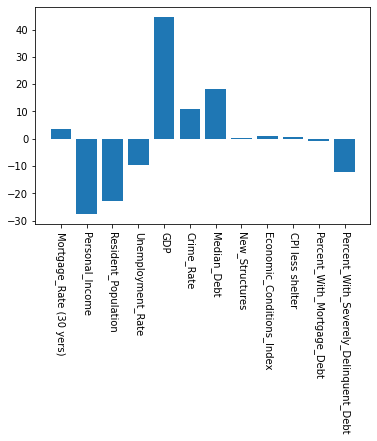

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2018,196.665120,4.03,76565.00,19276.6440,4.3,1799148.324,538.895100,27.83%,245047.3333,2.33%,4598.873831,2.90,230.297
1,2/1/2018,197.782954,4.33,76838.25,19271.6055,4.3,1804314.915,539.073092,27.97%,244735.6667,2.27%,4467.467264,2.94,232.256
2,3/1/2018,198.120734,4.44,77111.50,19266.5670,4.2,1809481.505,539.251083,28.10%,244424.0000,2.20%,3745.519561,2.77,231.599
3,4/1/2018,197.723899,4.47,77384.75,19261.5285,4.1,1814648.096,539.429075,27.93%,244326.3333,2.13%,4214.956696,2.72,232.455
4,5/1/2018,197.922307,4.59,77658.00,19256.4900,4.1,1819814.686,539.607067,27.77%,244228.6667,2.07%,3579.048955,2.69,233.694
5,6/1/2018,198.046348,4.57,77931.25,19251.4515,4.0,1824981.277,539.785058,27.60%,244131.0000,2.00%,3977.728696,2.58,234.083
6,7/1/2018,198.113635,4.53,78204.50,19246.4130,3.9,1830147.867,539.963050,27.67%,244501.3333,1.97%,4260.503262,2.32,233.478
7,8/1/2018,198.477340,4.55,78477.75,19241.3745,3.8,1835314.458,540.141042,27.73%,244871.6667,1.93%,5090.556959,2.62,233.643
8,9/1/2018,198.605966,4.63,78751.00,19236.3360,3.8,1840481.048,540.319033,27.80%,245242.0000,1.90%,4911.314579,2.92,234.836
9,10/1/2018,200.036857,4.83,79024.25,19231.2975,3.8,1845647.639,540.497025,27.53%,245087.0000,1.90%,6074.946755,2.96,234.245


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,196.665120,4.03,76565.00,19276.6440,4.3,1799148.324,538.895100,245047.3333,4598.873831,2.90,230.297,27.83,2.33
1,2/1/2018,197.782954,4.33,76838.25,19271.6055,4.3,1804314.915,539.073092,244735.6667,4467.467264,2.94,232.256,27.97,2.27
2,3/1/2018,198.120734,4.44,77111.50,19266.5670,4.2,1809481.505,539.251083,244424.0000,3745.519561,2.77,231.599,28.10,2.20
3,4/1/2018,197.723899,4.47,77384.75,19261.5285,4.1,1814648.096,539.429075,244326.3333,4214.956696,2.72,232.455,27.93,2.13
4,5/1/2018,197.922307,4.59,77658.00,19256.4900,4.1,1819814.686,539.607067,244228.6667,3579.048955,2.69,233.694,27.77,2.07


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,76565.00,19276.6440,4.3,1799148.324,538.895100,245047.3333,4598.873831,2.90,230.297,27.83,2.33
1,4.33,76838.25,19271.6055,4.3,1804314.915,539.073092,244735.6667,4467.467264,2.94,232.256,27.97,2.27
2,4.44,77111.50,19266.5670,4.2,1809481.505,539.251083,244424.0000,3745.519561,2.77,231.599,28.10,2.20
3,4.47,77384.75,19261.5285,4.1,1814648.096,539.429075,244326.3333,4214.956696,2.72,232.455,27.93,2.13
4,4.59,77658.00,19256.4900,4.1,1819814.686,539.607067,244228.6667,3579.048955,2.69,233.694,27.77,2.07
5,4.57,77931.25,19251.4515,4.0,1824981.277,539.785058,244131.0000,3977.728696,2.58,234.083,27.60,2.00
6,4.53,78204.50,19246.4130,3.9,1830147.867,539.963050,244501.3333,4260.503262,2.32,233.478,27.67,1.97
7,4.55,78477.75,19241.3745,3.8,1835314.458,540.141042,244871.6667,5090.556959,2.62,233.643,27.73,1.93
8,4.63,78751.00,19236.3360,3.8,1840481.048,540.319033,245242.0000,4911.314579,2.92,234.836,27.80,1.90
9,4.83,79024.25,19231.2975,3.8,1845647.639,540.497025,245087.0000,6074.946755,2.96,234.245,27.53,1.90


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000e+00,0.220289,4.030000e+00,4.462500e+00,4.560000e+00,4.632500e+00,4.870000e+00
Personal_Income,12.0,7.806788e+04,985.216886,7.656500e+04,7.731644e+04,7.806788e+04,7.881931e+04,7.957075e+04
Resident_Population,12.0,1.924893e+04,18.166570,1.922122e+04,1.923508e+04,1.924893e+04,1.926279e+04,1.927664e+04
Unemployment_Rate,12.0,4.000000e+00,0.195402,3.800000e+00,3.800000e+00,3.950000e+00,4.125000e+00,4.300000e+00
GDP,12.0,1.827565e+06,18628.407005,1.799148e+06,1.813356e+06,1.827565e+06,1.841773e+06,1.855981e+06
Crime_Rate,12.0,5.398741e+02,0.641758,5.388951e+02,5.393846e+02,5.398741e+02,5.403635e+02,5.408530e+02
Median_Debt,12.0,2.446920e+05,363.704092,2.441310e+05,2.443996e+05,2.447563e+05,2.449608e+05,2.452420e+05
New_Structures,12.0,4.670331e+03,850.752569,3.579049e+03,4.155650e+03,4.533171e+03,4.956125e+03,6.341929e+03
Economic_Conditions_Index,12.0,2.780000e+00,0.204094,2.320000e+00,2.672500e+00,2.835000e+00,2.925000e+00,3.020000e+00
CPI less shelter,12.0,2.329630e+02,1.299083,2.302970e+02,2.321640e+02,2.332800e+02,2.337913e+02,2.348360e+02


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.214696,0.928000,-1.149809,2.070570,-1.902347,0.145069,0.494371,0.399108,1.154565,-2.032917,-0.871516
1,-0.423295,2.251077,0.899759,-1.149809,2.096843,-1.897360,0.110686,0.437538,0.428703,1.305633,-1.962709,-0.896961
2,-0.317299,2.287458,0.871519,-1.204461,2.123116,-1.892373,0.076303,0.125297,0.302922,1.254969,-1.897515,-0.926647
3,-0.288391,2.323839,0.843278,-1.259112,2.149389,-1.887386,0.065529,0.328328,0.265928,1.320979,-1.982768,-0.956333
4,-0.172759,2.360220,0.815037,-1.259112,2.175662,-1.882400,0.054754,0.053299,0.243731,1.416524,-2.063006,-0.981778
5,-0.192031,2.396601,0.786796,-1.313763,2.201936,-1.877413,0.043980,0.225727,0.162343,1.446522,-2.148259,-1.011463
6,-0.230575,2.432982,0.758556,-1.368415,2.228209,-1.872426,0.084835,0.348027,-0.030028,1.399868,-2.113155,-1.024186
7,-0.211303,2.469362,0.730315,-1.423066,2.254482,-1.867439,0.125690,0.707023,0.191939,1.412592,-2.083066,-1.041149
8,-0.134215,2.505743,0.702074,-1.423066,2.280755,-1.862453,0.166545,0.629501,0.413906,1.504590,-2.047962,-1.053872
9,0.058504,2.542124,0.673833,-1.423066,2.307028,-1.857466,0.149445,1.132770,0.443501,1.459015,-2.183364,-1.053872


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[197.35050712 198.98450488 200.20655696 201.96843571 203.4012986
 204.91365339 206.81146935 209.52805919 211.83448694 213.26548935
 213.98231319 213.2301943 ]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,197.350507
1,198.984505
2,200.206557
3,201.968436
4,203.401299
5,204.913653
6,206.811469
7,209.528059
8,211.834487
9,213.265489
